<h1><center>Laboratorio 3: La desperación de Mr. Cheems 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra

- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Maximiliano Farren Avaria.
- Nombre de alumno 2: Sebastián Rubina Andrade.


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/MacFarren/Lab-Farren-Rubina)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar procesos más limpios en Feature Engineering.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 39.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
## Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
#try:
#    from google.colab import drive
#    drive.mount("/content/drive")
#    path = 'Dirección donde tiene los archivos en el Drive'
#except:
#    print('Ignorando conexión drive-colab')

In [3]:
# Subir archivo
from google.colab import files
uploaded = files.upload()

Saving online_retail_data.pickle to online_retail_data.pickle


In [4]:
df_retail = pd.read_pickle("online_retail_data.pickle")

# Feature engineering en datos de retail 🛍️

### 0. Cargar Dataset

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

Mr. Cheems, gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas. En una reunión, Mr Cheems le comenta que la calidad de sus datos no es muy buena, por lo que le solicita a usted que limpie su base de datos y cree nuevos atributos relevantes para el negocio.

Por ello, el área de ventas les entrega archivo llamado `online_retail_data.pickle` el cual usted decide cargar a continuación.

In [5]:
## Inserte su código aquí
#df_retail = pd.read_pickle("C:\\Users\\Seba\\OneDrive\\Documentos\\LabMDS\\Lab-Farren-Rubina\\Lab3\\online_retail_data.pickle")
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,ID489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,ID489434,79323P,PINK CHERRY LIGHTS,12.0,NaT,6.75,13085.0,United Kingdom
2,ID489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,ID489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,ID489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# Estadísticas descriptivas del DataFrame
df_retail.describe()

,Quantity,InvoiceDate,Price
count,393032.000000,391639,392591.000000
mean,13.799726,2010-07-01 04:53:43.573341696,3.309850
min,1.000000,2009-12-01 07:45:00,0.000000
25%,2.000000,2010-03-26 13:08:00,1.250000
50%,5.000000,2010-07-09 11:43:00,1.950000
75%,12.000000,2010-10-14 14:08:00,3.750000
max,19152.000000,2010-12-09 20:01:00,10953.500000
std,98.520773,NaN,35.407209


### 1. Función para explorar características [0.5 puntos]

<p align="center">
  <img width=300 src="https://editor.analyticsvidhya.com/uploads/47389meme.png">
</p>




Tras inspeccionar brevemente los datos proporcionados, usted decide crear una función que realice lo siguiente:
- Plotee un histograma para las variables precios y cantidad. [0.3 puntos]
- Imprima un conteo de datos nulos por variable [0.2 puntos]

**Nota**: Para generar los gráficos no es obligatorio el uso de `plotly`, pero si es altamente recomendado. Pueden encontrar más información de esta librería en este [enlace](https://plotly.com/python/).

**Respuesta:**

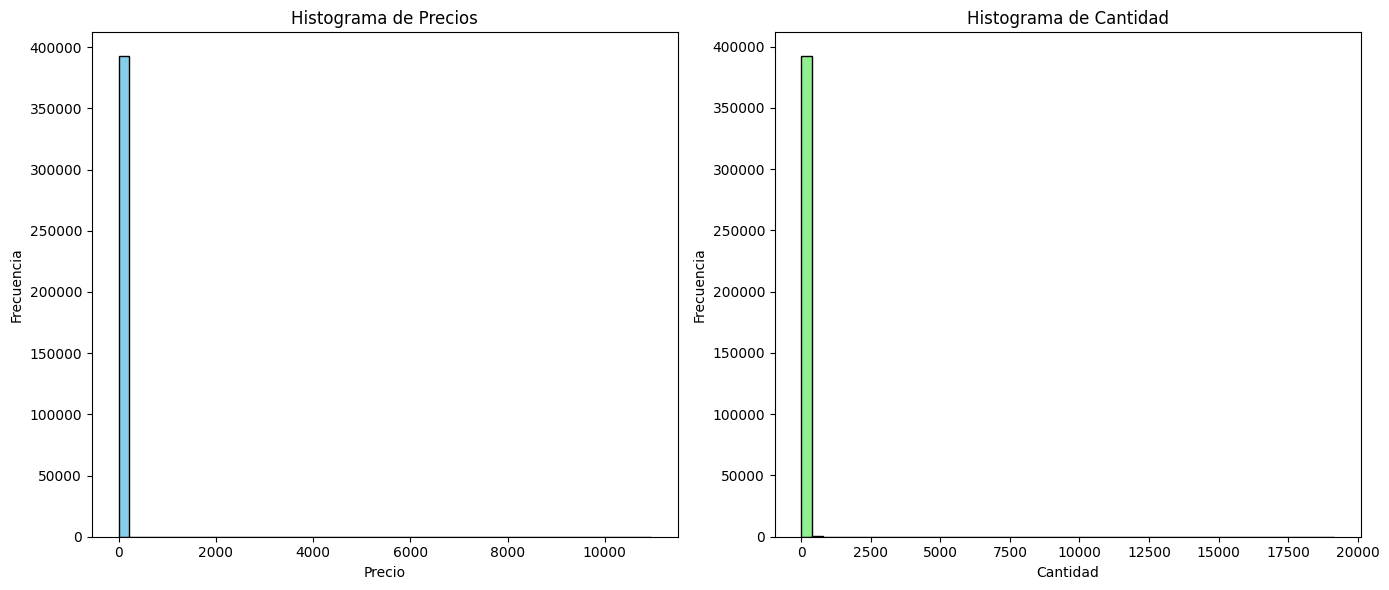


Conteo de datos nulos por variable:
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64


In [7]:
import matplotlib.pyplot as plt

def explore_data(df_retail):
    # Histogramas para las columnas 'Price' y 'Quantity'
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histograma para 'Price'
    axes[0].hist(df_retail['Price'].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[0].set_title('Histograma de Precios')
    axes[0].set_xlabel('Precio')
    axes[0].set_ylabel('Frecuencia')

    # Histograma para 'Quantity'
    axes[1].hist(df_retail['Quantity'].dropna(), bins=50, color='lightgreen', edgecolor='black')
    axes[1].set_title('Histograma de Cantidad')
    axes[1].set_xlabel('Cantidad')
    axes[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    # Contar los datos nulos por variable
    null_counts = df_retail.isnull().sum()
    print("\nConteo de datos nulos por variable:")
    print(null_counts)

# Ejecutar la función con el DataFrame retail_data
explore_data(df_retail)


Se ve un histograma bastante peculiar por lo que debemos recordar lo visto de las descripción de las columnas (el resumen que está más adelante) con el histograma nos hace ver que hay outliers/cosas mal ingresadas.

In [8]:
cantidad_promedio = df_retail['Quantity'].mean()
cantidad_mediana = df_retail['Quantity'].median()

precio_promedio = df_retail['Price'].mean()
precio_mediana = df_retail['Price'].median()

print(f"Promedio de Cantidad: {cantidad_promedio}")
print(f"Mediana de Cantidad: {cantidad_mediana}")
print(f"Promedio de Precio: {precio_promedio}")
print(f"Mediana de Precio: {precio_mediana}")


cantidad_min = df_retail['Quantity'].min()
cantidad_max = df_retail['Quantity'].max()
precio_min = df_retail['Price'].min()
precio_max = df_retail['Price'].max()

print(f"\nMínimo de Cantidad: {cantidad_min}")
print(f"Máximo de Cantidad: {cantidad_max}")
print(f"Mínimo de Precio: {precio_min}")
print(f"Máximo de Precio: {precio_max}")


Promedio de Cantidad: 13.799726230943028
Mediana de Cantidad: 5.0
Promedio de Precio: 3.3098504142988507
Mediana de Precio: 1.95

Mínimo de Cantidad: 1.0
Máximo de Cantidad: 19152.0
Mínimo de Precio: 0.0
Máximo de Precio: 10953.5


### 2. Eliminando outliers [1.0 puntos]

<p align="center">
  <img width=300 src="https://media.licdn.com/dms/image/C5612AQGdXKCka7HumA/article-cover_image-shrink_600_2000/0/1520056407281?e=2147483647&v=beta&t=VZcfjjzjK4LxXdZkSu1KisWC0Ry8bk4tPCn3R8aYdNM">
</p>




#### 2.1 Creando la clase IQR [0.5 puntos]

Entre las falencias de los datos, Mr. Cheems le comenta que a veces los operadores no ingresan el precio correcto de los productos. Mr. Cheems le comenta que se dio cuenta de este fenómeno porque hay productos con precios exagerádamente altos o bajos. Por lo cual usted decide eliminar outliers del dataframe a traves del rango intercuartil el cual cuenta con los siguientes pasos:

1. Calcular el primer cuartil $Q1$ y el tercer cuartil $Q3$. Hint: utilice el método `quantile()`

2. Calcular el rango intercuartil (RIC): $RIC = Q3 - Q1$

3. Calcular los límites para identificar outliers:
 - Límite inferior: $~~Q1 - \lambda \cdot RIC$
 - Límite superior: $~~Q3 + \lambda \cdot RIC$

4. Eliminar outliers: Los outliers son los datos que están por debajo del límite inferior o por encima del límite superior.


Para realizar dicha tarea, usted decide crear una clase llamada `IQR()` utilizando `BaseEstimator` y `TransformerMixin` para realizar una transformación de cada una de las columnas numéricas del DataFrame utilizando `ColumnTransformer()` más tarde. Considere que lambda debe ser $\lambda$ un parámetro a definir por el usuario.

**Hint:** tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer).

**Nota:** No modificar el método set_output de la clase IQR

**Respuesta:**

In [9]:
# Implementación de la clase IQR
class IQR(BaseEstimator, TransformerMixin):
    def __init__(self, lambda_=1.5):
        """
        Constructor para la clase IQR.
        :param lambda_: Parámetro para ajustar el rango intercuartílico.
        """
        self.lambda_ = lambda_

    def fit(self, X, y=None):
        """
        Cálculo de los cuartiles y el rango intercuartílico (IQR).
        :param X: DataFrame con los datos.
        :param y: Opcional, no se usa.
        """
        # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
        self.Q1 = X.quantile(0.25)
        self.Q3 = X.quantile(0.75)
        # Calcular el rango intercuartílico (IQR)
        self.IQR = self.Q3 - self.Q1
        return self

    def transform(self, X):
        """
        Eliminar los outliers según los límites calculados.
        :param X: DataFrame con los datos.
        :return: DataFrame con los outliers eliminados.
        """
        # Limites para identificar outliers
        lower_bound = self.Q1 - self.lambda_ * self.IQR
        upper_bound = self.Q3 + self.lambda_ * self.IQR

        # Aplicar los límites a cada columna
        X_filtered = X.copy()
        for col in X.columns:
            X_filtered = X_filtered[(X_filtered[col] >= lower_bound[col]) & (X_filtered[col] <= upper_bound[col])]

        return X_filtered

    def set_output(self, transform='default'):
        """
        No se modifica esta función
        """
        return self

# Aplicar la columna Price
iqr_transformer = IQR(lambda_=1.5)

# Ajustar el modelo
retail_data_filtered = iqr_transformer.fit(df_retail[['Price']]).transform(df_retail[['Price']])

# Mostrar las primeras filas del DataFrame transformado
retail_data_filtered.head()


,Price
0,6.95
1,6.75
2,6.75
3,2.10
4,1.25


In [10]:
# Calcular el promedio y la mediana de 'Quantity' y 'Price'

precio_promedio = retail_data_filtered['Price'].mean()
precio_mediana = retail_data_filtered['Price'].median()

print(f"Promedio de Precio: {precio_promedio}")
print(f"Mediana de Precio: {precio_mediana}")


precio_min = retail_data_filtered['Price'].min()
precio_max = retail_data_filtered['Price'].max()

print(f"Mínimo de Precio: {precio_min}")
print(f"Máximo de Precio: {precio_max}")

Promedio de Precio: 2.284506952589303
Mediana de Precio: 1.69
Mínimo de Precio: 0.0
Máximo de Precio: 7.5


Efectivamente el código funciona, se observa comparando con los resultados anteriores

#### 2.2 Creación del Pipeline [0.5 puntos]

Para comenzar introduciéndose en el uso de pipeline, usted decide definir un pipeline con el Transformer previamente definido. Además, usted decide visualizar cómo cambia la distribución de las variables Precio y Cantidad antes y despues de aplicar IQR. Para ello, usted aplica los siguientes pasos:

- Definir un pipeline llamado `numeric_transformations` para las variables precio y cantidad con la transformación IQR. [0.1 puntos]
- Defina un column transformer que aplique `numeric_transformations` para las variables numéricas y `passthrough` para las variables categóricas. Adicionalmente, fije el parámetro `verbose_feature_names_out` en `False`. Ver hint al final [0.1 puntos]
- Defina el dataframe `df_iqr` aplicado el column transformer a los datos proporcionados por Mr. Cheems considerando un valor de $\lambda$ que tenga un desempeño aceptable para ambas variables. [0.1 puntos]
- Usar `explore_data` en `df_retail` y en `df_iqr`.  [0.1 puntos]
- Reportar los cambios observados en la distribución de las variables. ¿Qué sucede al aumentar el valor de lambda? [0.1 puntos]


**Hint:** El transformador `passthrough` está predefinido y es una opción que puedes usar para las columnas que no deseas transformar. Al especificar 'passthrough' para una parte de tu ColumnTransformer, las columnas correspondientes pasarán a través del ColumnTransformer sin ninguna modificación. El siguiente [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) le puede ser útil.

**Nota:** Mantenga el método set_output del column transformer con la transformación `pandas` para obtener un dataframe una vez aplicado el column transformer.

**Respuesta:**

Apóyese de la siguiente estructura para su respuesta:

Distribución de las variables en df_retail (antes de la transformación):


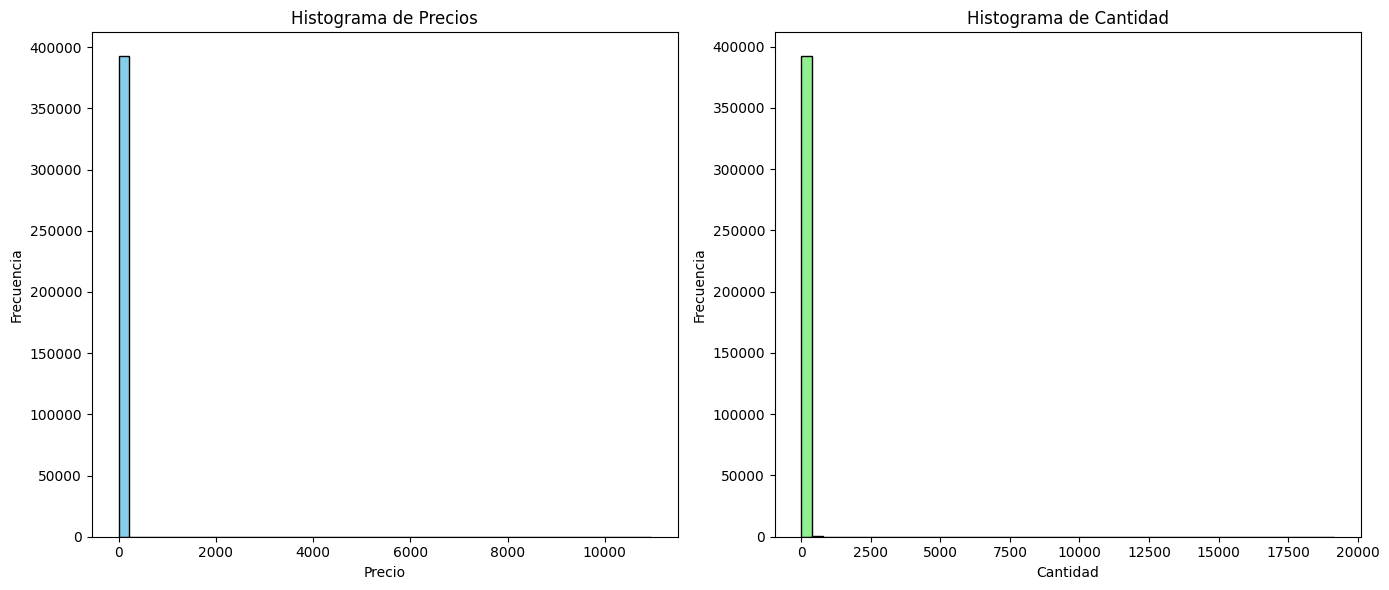


Conteo de datos nulos por variable:
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64
Distribución de las variables en df_iqr (después de la transformación):


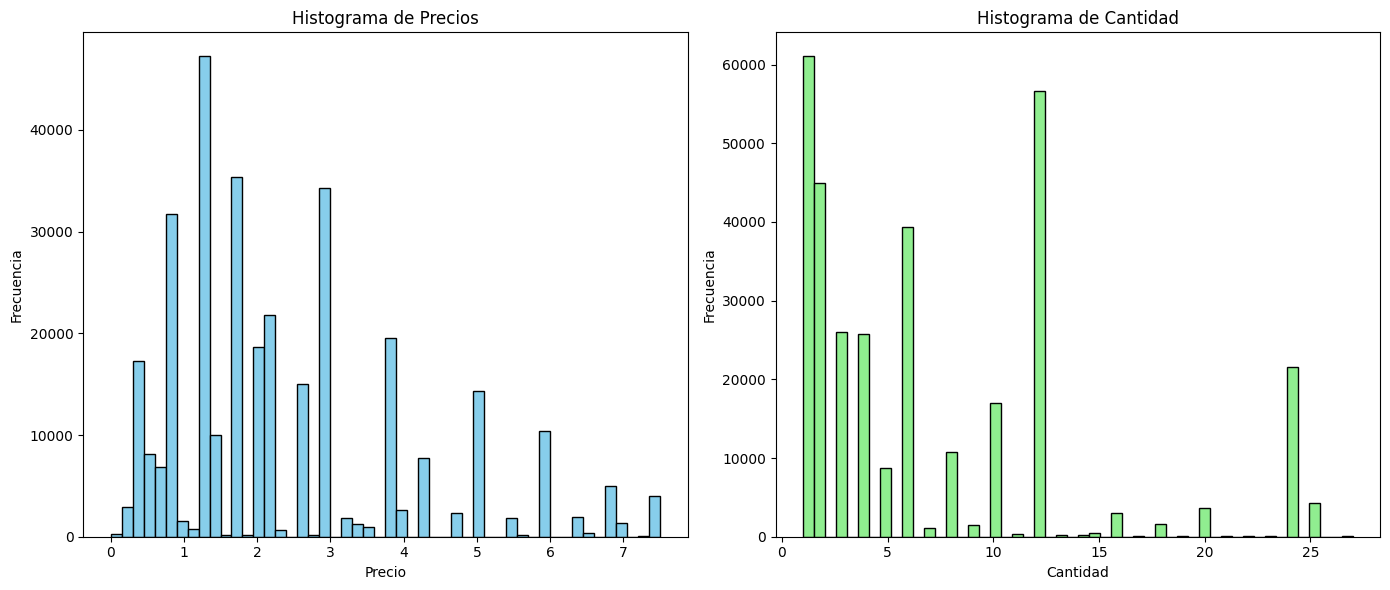


Conteo de datos nulos por variable:
Price          72433
Quantity       72433
Description        0
Country            0
Invoice            0
StockCode          0
InvoiceDate     9308
Customer ID        0
dtype: int64

Distribución después de aplicar lambda=1.5:


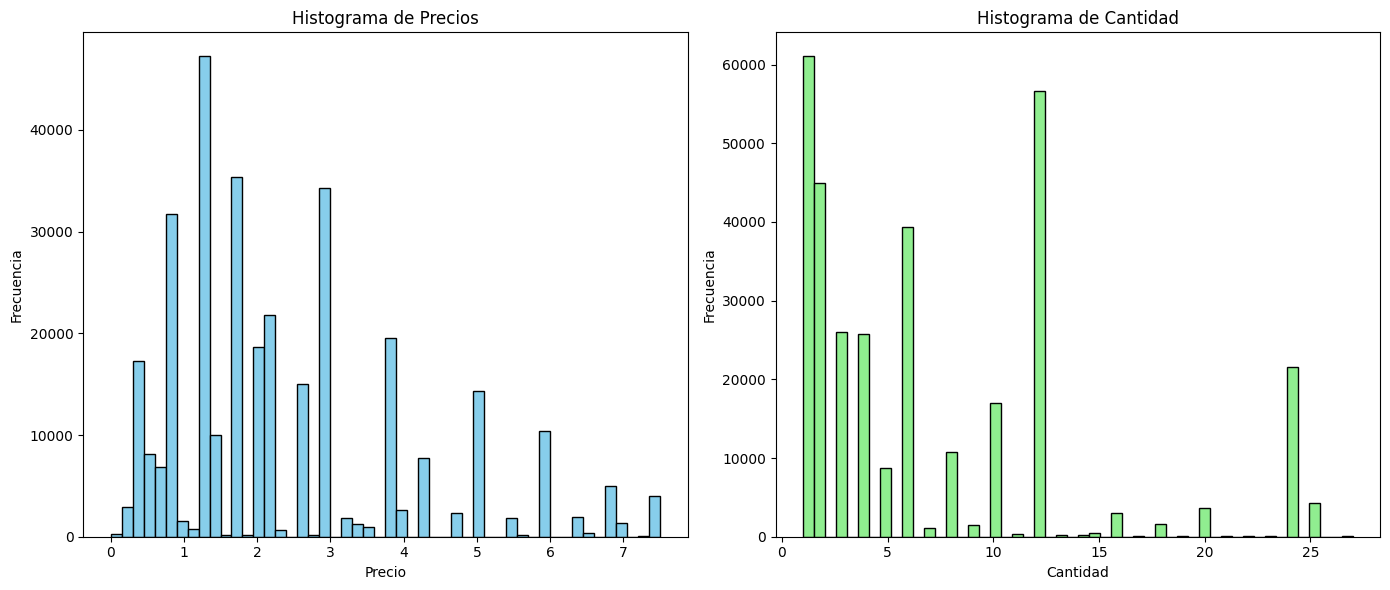


Conteo de datos nulos por variable:
Price          72433
Quantity       72433
Description        0
Country            0
Invoice            0
StockCode          0
InvoiceDate     9308
Customer ID        0
dtype: int64

Distribución después de aplicar lambda=2:


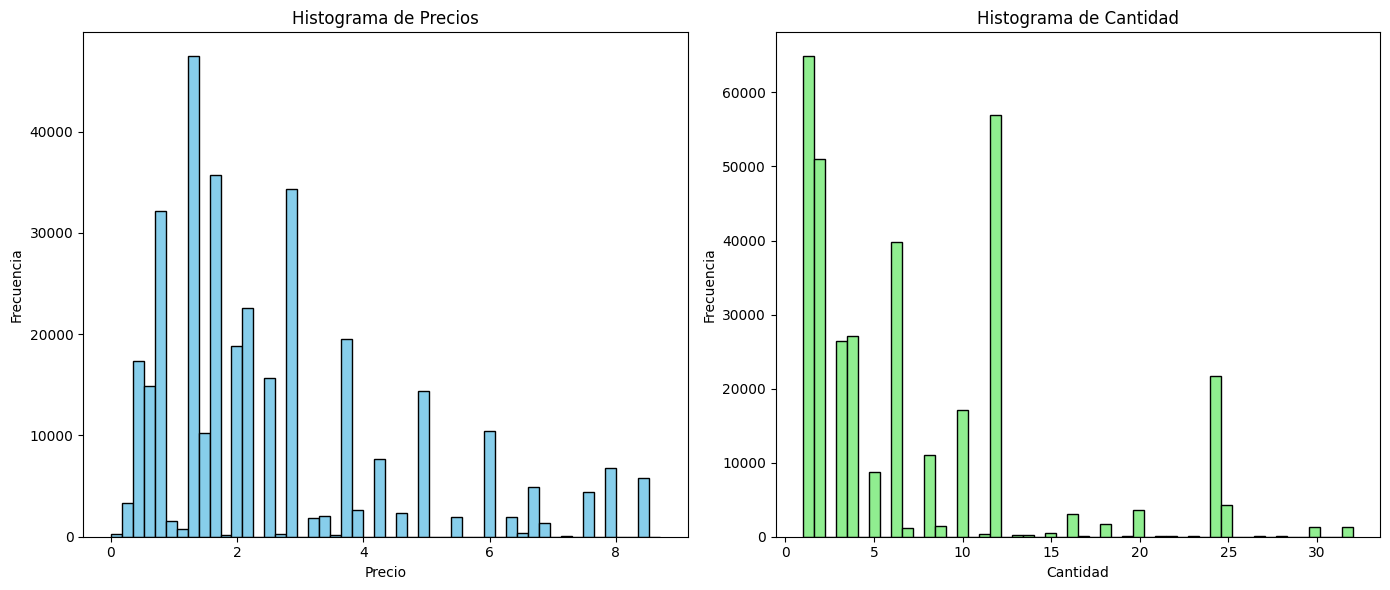


Conteo de datos nulos por variable:
Price          56672
Quantity       56672
Description        0
Country            0
Invoice            0
StockCode          0
InvoiceDate     9308
Customer ID        0
dtype: int64

Distribución después de aplicar lambda=3:


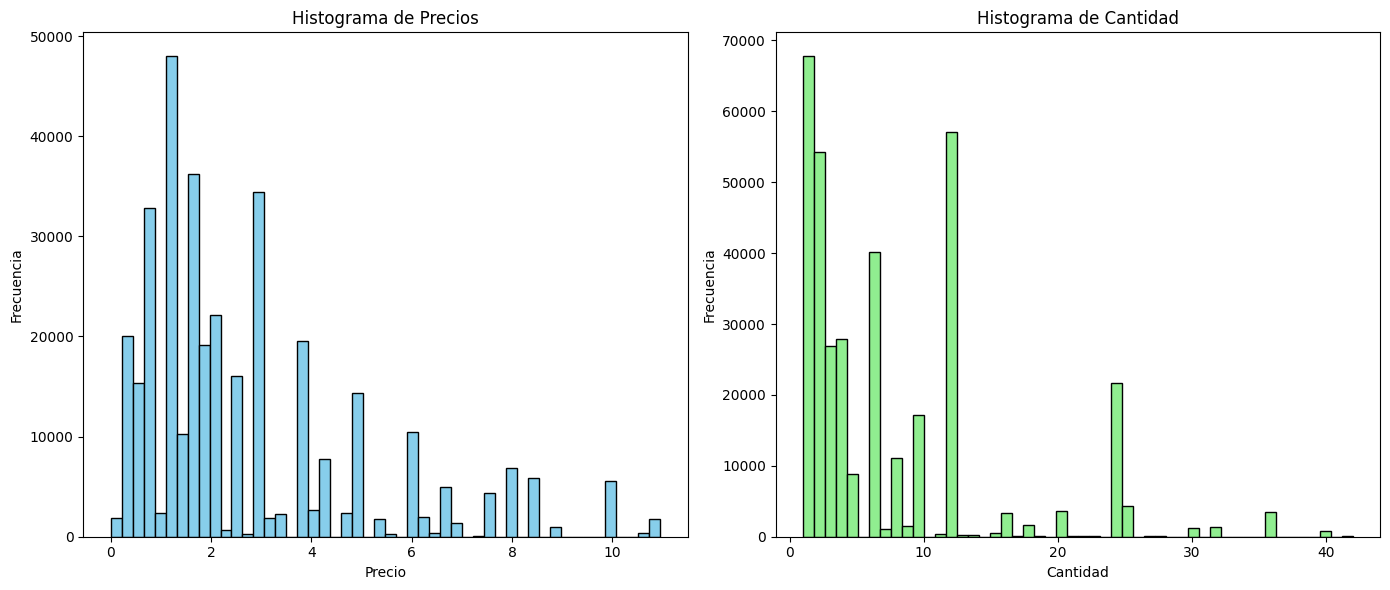


Conteo de datos nulos por variable:
Price          43610
Quantity       43610
Description        0
Country            0
Invoice            0
StockCode          0
InvoiceDate     9308
Customer ID        0
dtype: int64


In [11]:
# Definición de las variables que pasarán por cada pipeline
numerical_columns = ['Price', 'Quantity']  # Columnas numéricas
categorical_columns = ['Description', 'Country']  # Columnas categóricas

# Definición del pipeline para las transformaciones numéricas (solo aplicar IQR a las columnas numéricas)
numeric_transformations = Pipeline([
    ('iqr', IQR(lambda_=1.5))  # Aplicar IQR solo a columnas numéricas (se ajusta lambda según sea necesario)
])

# Definición del pipeline para las columnas categóricas (passthrough para no transformarlas)
categoric_transformations = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent'))  # Imputar con la categoría más frecuente
])

# ColumnTransformer: Se aplican las transformaciones para las columnas numéricas y categóricas
column_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformations, numerical_columns),  # Se aplica IQR solo a las columnas numéricas
        ('categorical', categoric_transformations, categorical_columns)  # Passthrough para las columnas categóricas
    ],
    remainder='passthrough',  # Las columnas no transformadas se dejan sin cambios
    verbose_feature_names_out=False  # No utilizar prefijos de transformación en los nombres de las columnas
)

# Configuración para obtener un DataFrame con el resultado de la transformación
column_transformer.set_output(transform='pandas')

# Aplicamos el ColumnTransformer a los datos
df_iqr = column_transformer.fit_transform(df_retail)

# Visualizar los cambios en la distribución de los datos (antes de la transformación)
print("Distribución de las variables en df_retail (antes de la transformación):")
explore_data(df_retail)  # Usar explore_data para verificar los cambios en la distribución antes de aplicar IQR

# Visualizar los cambios en la distribución de los datos (después de la transformación)
print("Distribución de las variables en df_iqr (después de la transformación):")
explore_data(df_iqr)  # Usar explore_data para verificar los cambios en la distribución después de aplicar IQR

# Ajuste del valor de lambda
lambda_values = [1.5, 2, 3]  # Ajustamos diferentes valores de lambda

for lambda_value in lambda_values:
    # Aplicamos el transformador con el nuevo valor de lambda
    numeric_transformations.set_params(iqr__lambda_=lambda_value)
    df_iqr_lambda = column_transformer.fit_transform(df_retail)

    print(f"\nDistribución después de aplicar lambda={lambda_value}:")
    explore_data(df_iqr_lambda)  # Visualizar cambios con diferentes valores de lambda

In [12]:
df_iqr.head()

,Price,Quantity,Description,Country,Invoice,StockCode,InvoiceDate,Customer ID
0,6.95,12.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom,ID489434,85048,2009-12-01 07:45:00,13085.0
1,6.75,12.0,PINK CHERRY LIGHTS,United Kingdom,ID489434,79323P,NaT,13085.0
2,6.75,12.0,WHITE CHERRY LIGHTS,United Kingdom,ID489434,79323W,2009-12-01 07:45:00,13085.0
4,1.25,24.0,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom,ID489434,21232,2009-12-01 07:45:00,13085.0
5,1.65,24.0,PINK DOUGHNUT TRINKET POT,United Kingdom,ID489434,22064,2009-12-01 07:45:00,13085.0


In [13]:
df_iqr.head()

,Price,Quantity,Description,Country,Invoice,StockCode,InvoiceDate,Customer ID
0,6.95,12.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom,ID489434,85048,2009-12-01 07:45:00,13085.0
1,6.75,12.0,PINK CHERRY LIGHTS,United Kingdom,ID489434,79323P,NaT,13085.0
2,6.75,12.0,WHITE CHERRY LIGHTS,United Kingdom,ID489434,79323W,2009-12-01 07:45:00,13085.0
4,1.25,24.0,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom,ID489434,21232,2009-12-01 07:45:00,13085.0
5,1.65,24.0,PINK DOUGHNUT TRINKET POT,United Kingdom,ID489434,22064,2009-12-01 07:45:00,13085.0


Tras aplicar el transformer iqr a las variables precio y cantidad, los datos se volvieron más equilibrados, eliminando los putiliers que hacían que la distribución se viera tan rara. Antes de la transformación, ambas variables presentaban distribuciones sesgadas, con muchos valores extremos que distorsionaban los resultados, es como cuando se calcula el promedio de la riqueza considerando a todas las personas, el resultado es sesgado ya que el promedio es mucho más alto por personas con riqueza extrama, por ende no es representativo y lleva a un mal análisis.

Al aumentar el valor de lambda, los límites del iqr se hicieron más estrictos, eliminando más outliers y centrando la distribución alrededor de los valores más cercanos a lo "común". Eso si, si lambda es demasiado alto, pueden eliminarse datos válidos, lo que podría eliminar info valiosa. En resumen, la transformación iqr mejora la distribución de los datos al eliminar los outliers, pero es esencial ajustar adecuadamente el parámetro lambda para evitar perder información importante.

### 3. Agregando un imputer al pipeline [1.0 puntos]



<p align="center">
  <img width=300 src="https://media.makeameme.org/created/hmm-there-is.jpg">
</p>

Para continuar con la limpieza del dataframe usted decide imputar los datos nulos de las variables numéricas, para lo cual decide realizar las siguientes tareas:

1. Crear un pipeline para variables categóricas llamado `categoric_transformations` con un paso llamado `mode_imputer`, en el cual se imputen los datos faltantes por la categoría más frecuente.
2. Agregar al pipeline `numeric_transformations` un paso llamado `mean_imputer`, en el cual se imputen los datos por la media usando [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) [0.1 puntos]
3. Crear y aplicar un `ColumnTransformer` actualizado con los pipelines `categoric_transformations` y `numeric_transformations` a `df_retail`, creando un dataframe llamado `df_mean_imputer`. [0.1 puntos]
4. Comparar los resultados de `explore_data` en `df_mean_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [0.2 puntos]
5. Cambiar el imputer de `numeric_transformations` por [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) y definir un nuevo dataframe llamado `df_knn_imputer`, aplicando el nuevo ColumnTransformer a `df_retail`. En caso de los tiempos de ejecución sean altos puede probar a reducir el parámetro `n_neighbors`. [0.1 puntos]
6. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [0.2 puntos]
7. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_mean_imputer`. ¿Cuál método de imputación es mejor? Deje el método escogido en el ColumnTransformer. [0.2 puntos]

**Nota: Fije el parámetro verbose_feature_names_out en `False` y utilice el método set_output con transformación `pandas` en cada ColumnTransformer para obtener como salida un dataframe.**

**Respuesta:**

In [14]:
from sklearn.impute import SimpleImputer, KNNImputer

Distribución después de imputar con la media en df_mean_imputer:


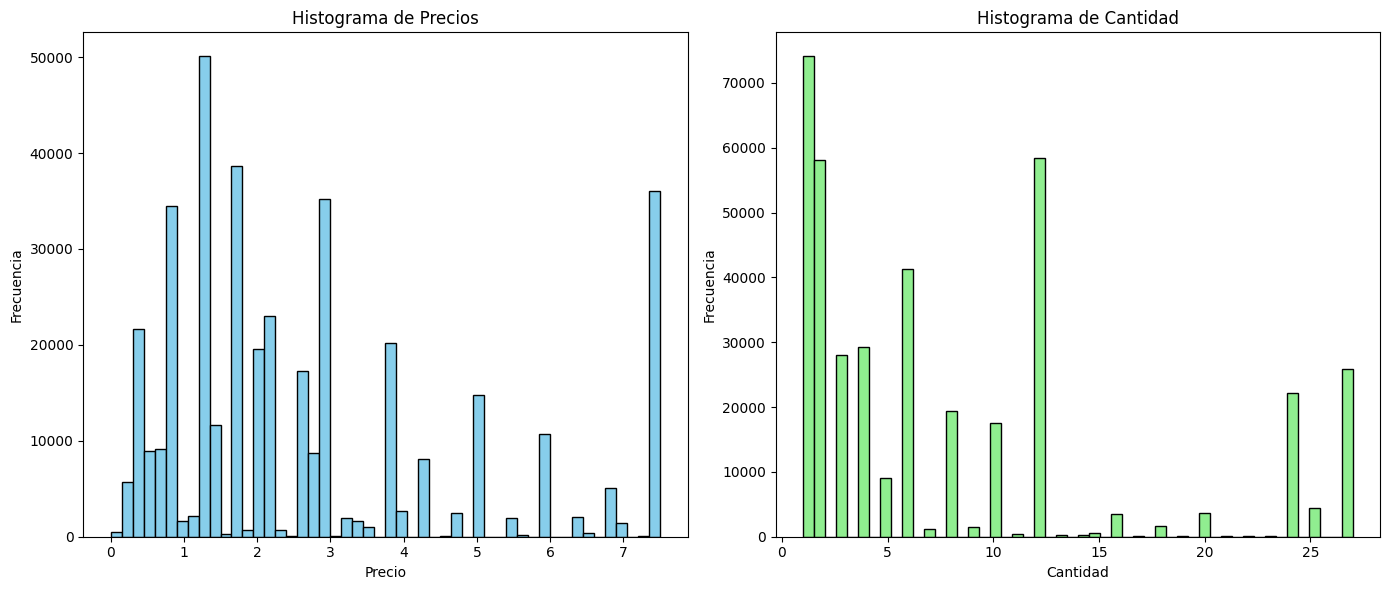


Conteo de datos nulos por variable:
Price             0
Quantity          0
Description       0
Country           0
Invoice           0
StockCode         0
InvoiceDate    9308
Customer ID       0
dtype: int64
Distribución después de imputar con KNNImputer:


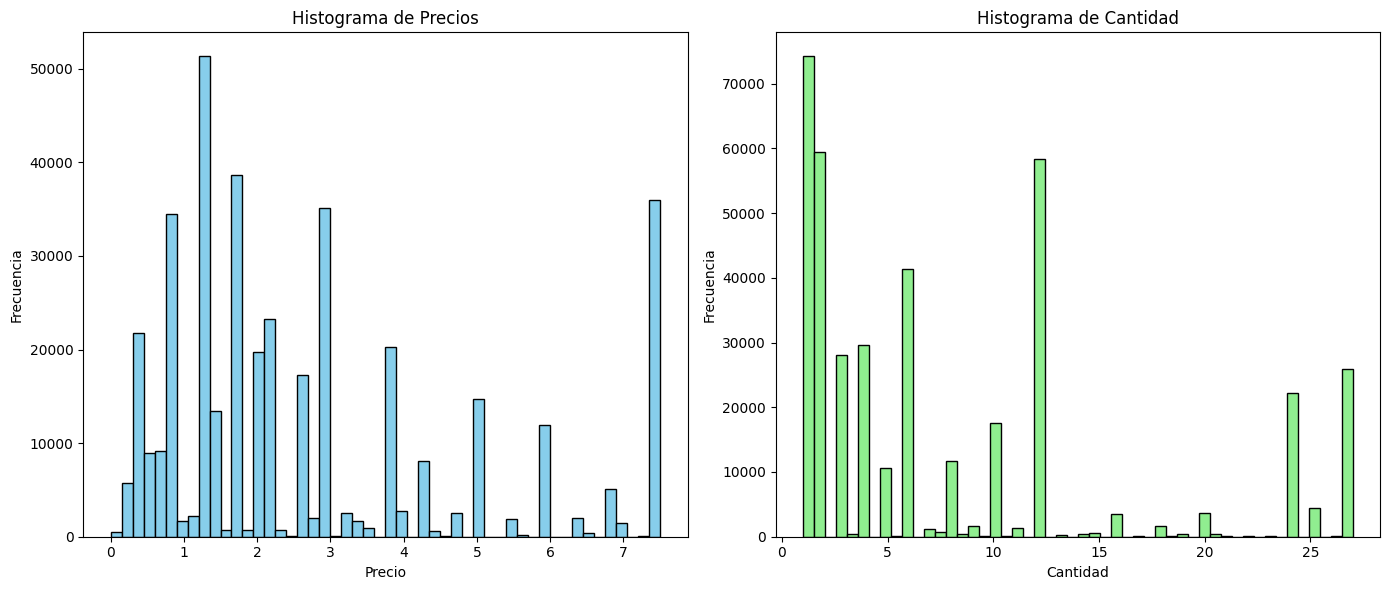


Conteo de datos nulos por variable:
Price          0
Quantity       0
Description    0
Country        0
dtype: int64
Distribución de df_mean_imputer (después de imputación por media):


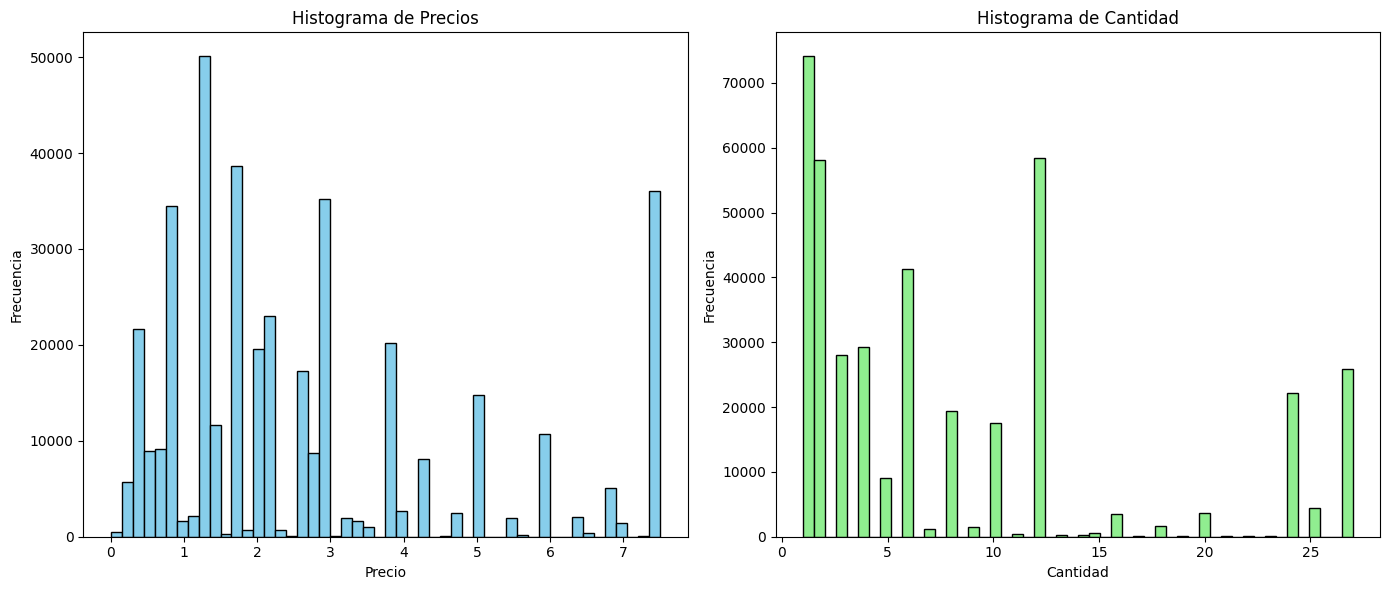


Conteo de datos nulos por variable:
Price             0
Quantity          0
Description       0
Country           0
Invoice           0
StockCode         0
InvoiceDate    9308
Customer ID       0
dtype: int64


In [15]:
# Definir las columnas a transformar
numerical_columns = ['Price', 'Quantity']  # Columnas numéricas
categorical_columns = ['Description', 'Country']  # Columnas categóricas

# Función para limitar los outliers usando IQR con clip()
def clip_outliers(df, cols, q1=0.25, q3=0.75, lambda_=1.5):
    # Calcular el rango intercuartil (IQR)
    IQR = df[cols].quantile(q3) - df[cols].quantile(q1)
    lower_bound = df[cols].quantile(q1) - lambda_ * IQR
    upper_bound = df[cols].quantile(q3) + lambda_ * IQR
    # Limitar los valores fuera de los límites usando clip
    df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df

#Primero, limitamos los outliers con clip
df_clipped = clip_outliers(df_retail, numerical_columns)

# Definir el pipeline para imputación de datos faltantes
categoric_transformations = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent'))  # Imputar con la categoría más frecuente
])

numeric_transformations = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean'))  # Imputación por la media para datos numéricos
])

# Crear el ColumnTransformer para imputación
column_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformations, numerical_columns),  # Imputar las columnas numéricas
        ('categorical', categoric_transformations, categorical_columns)  # Imputación para las variables categóricas
    ],
    remainder='passthrough',  # Las columnas no transformadas se dejan sin cambios
    verbose_feature_names_out=False  # No utilizar prefijos de transformación en los nombres de las columnas
)

column_transformer.set_output(transform='pandas')  # Configurar la salida como DataFrame

# Aplicar el ColumnTransformer a df_clipped (aplicamos imputación después de recortar outliers)
df_mean_imputer = column_transformer.fit_transform(df_clipped)

# Visualizar los cambios después de la imputación
print("Distribución después de imputar con la media en df_mean_imputer:")
explore_data(df_mean_imputer)  # Visualizar los cambios en la distribución después de imputación

# Cambiar el imputador de numeric_transformations por KNNImputer y crear un nuevo dataframe
numeric_transformations_knn = Pipeline([
    ('knn_imputer', KNNImputer(n_neighbors=3))  # Imputación con KNN
])

# Crear el nuevo ColumnTransformer con KNNImputer
column_transformer_knn = ColumnTransformer([
    ('numerical', numeric_transformations_knn, numerical_columns),
    ('categorical', categoric_transformations, categorical_columns)
], verbose_feature_names_out=False)

column_transformer_knn.set_output(transform='pandas')  # Configurar la salida como DataFrame

# Aplicar el ColumnTransformer con KNNImputer a df_clipped
df_knn_imputer = column_transformer_knn.fit_transform(df_clipped)

# Comparar la distribución de los datos en df_knn_imputer y df_mean_imputer
print("Distribución después de imputar con KNNImputer:")
explore_data(df_knn_imputer)  # Ver la distribución en df_knn_imputer

# Comparar los resultados entre df_knn_imputer y df_mean_imputer
print("Distribución de df_mean_imputer (después de imputación por media):")
explore_data(df_mean_imputer)  # Ver la distribución en df_mean_imputer

La distribución de df_iqr muestra un comportamiento mucho más centrado, con los valores más altos limitados debido a la aplicación del IQR (Interquartile Range). Se observan menos valores extremos y una concentración de datos en un rango más estrecho, especialmente para la columna "Precio", lo que sugiere que los outliers han sido eliminados de la distribución. En cambio, en df_mean_imputer, los datos presentan una mayor dispersión, ya que la imputación de valores faltantes por la media no modifica los valores extremos.

En df_knn_imputer, los valores de "Precio" y "Cantidad" son más dispersos comparados con df_iqr. Esto ocurre porque el KNN imputa utilizando los valores de los vecinos más cercanos, lo que genera una distribución más dispersa, especialmente en columnas con valores más heterogéneos. df_iqr mantiene un rango más estrecho, debido a la eliminación de outliers, lo que hace que la dispersión sea menos pronunciada.

Comparando df_knn_imputer con df_mean_imputer, la diferencia clave es la dispersión en los valores imputados. KNN genera valores imputados basados en los vecinos más cercanos, lo que permite una distribución más homogénea entre los valores de la misma categoría. Por otro lado, df_mean_imputer presenta una distribución más sesgada, con un gran número de valores agrupados alrededor de la media. Esto hace que KNN sea más adecuado para el caso.

In [16]:
df_iqr.head()

,Price,Quantity,Description,Country,Invoice,StockCode,InvoiceDate,Customer ID
0,6.95,12.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom,ID489434,85048,2009-12-01 07:45:00,13085.0
1,6.75,12.0,PINK CHERRY LIGHTS,United Kingdom,ID489434,79323P,NaT,13085.0
2,6.75,12.0,WHITE CHERRY LIGHTS,United Kingdom,ID489434,79323W,2009-12-01 07:45:00,13085.0
4,1.25,24.0,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom,ID489434,21232,2009-12-01 07:45:00,13085.0
5,1.65,24.0,PINK DOUGHNUT TRINKET POT,United Kingdom,ID489434,22064,2009-12-01 07:45:00,13085.0


### 4. Creación de nuevas features [2.0 puntos]

<p align="center">
  <img width=250 src="https://miro.medium.com/max/1000/1*JtTWgAcfVTWV8OTjT47Atg.jpeg">
</p>


#### 4.1 Definicion de LRMFP [1.0 puntos]

Dado que Mr. Lepin está interesado en obtener nuevos atributos relevantes para su negocio, su equipo de expertos sugiere la construcción de variables **LRMFP**, las que se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales. **Considere "hoy" como la fecha mas reciente del dataset**.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente.

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.


$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**<u>Formato</u> del Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

Usaremos la data procesada ya que queremos un resultado que no esté sesgado

**Respuesta:**

In [17]:
def custom_features(dataframe_in):
    # Asegurarnos de que 'InvoiceDate' esté en formato datetime
    dataframe_in['InvoiceDate'] = pd.to_datetime(dataframe_in['InvoiceDate'])

    # Considerar 'hoy' como la fecha más reciente en el dataset
    today = dataframe_in['InvoiceDate'].max()

    # Calcular Length: Diferencia entre la primera y la última compra del cliente
    dataframe_in['Length'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (x.max() - x.min()).days)

    # Calcular Recency: Días desde la última compra
    dataframe_in['Recency'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (today - x.max()).days)

    # Calcular Monetary: Promedio de la cantidad gastada por cada cliente
    dataframe_in['Monetary'] = dataframe_in.groupby('Customer ID')['Price'].transform('sum')  # Usar Price como TotalPrice

    # Calcular Frequency: Número total de compras realizadas por cada cliente
    dataframe_in['Frequency'] = dataframe_in.groupby('Customer ID')['Invoice'].transform('nunique')  # Usamos 'Invoice' para contar las compras

    # Calcular Periodicity: Desviación estándar de los tiempos entre visitas
    dataframe_in['Date_diff'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].diff().dt.days
    dataframe_in['Periodicity'] = dataframe_in.groupby('Customer ID')['Date_diff'].transform('std')

    # Ahora eliminamos las columnas auxiliares (como 'Date_diff')
    dataframe_in = dataframe_in.drop(columns=['Date_diff'])

    # Seleccionar solo una fila por cliente (la primera fila de cada cliente, ya que los valores son los mismos por cliente)
    result = dataframe_in.drop_duplicates(subset='Customer ID', keep='first')

    return result[['Customer ID', 'Length', 'Recency', 'Monetary', 'Frequency', 'Periodicity']]

# Usar df_iqr para calcular las características LRMFP
df_lrmfp = custom_features(df_iqr)

# Ver el resultado esperado
df_lrmfp.head()



/tmp/ipython-input-1754057044.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe_in['Length'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (x.max() - x.min()).days)
/tmp/ipython-input-1754057044.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe_in['Recency'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (today - x.max()).days)
/tmp/ipython-input-1754057044.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
0,13085.0,59.0,314.0,200.10,6,13.718011
12,13078.0,372.0,1.0,1120.11,32,18.851581
32,15362.0,290.0,83.0,87.51,2,66.480596
71,12682.0,373.0,0.0,942.14,23,17.597542
90,18087.0,359.0,14.0,134.54,15,48.856452


#### 4.2 Agregando las custom features [1.0 puntos]

Ahora, usted decide agregar al pipeline las nuevas variables creadas, para lo cual realiza las siguientes tareas:

1. Cree un nuevo pipeline llamado `retail_pipeline` que encapsule el ColumnTransformer y calcule las LRMFP. El primer paso del pipeline llámelo  `col_tranformer` y el segundo paso llámelo `custom_features`, incorpora las nuevas variables al dataframe. Hint: les puede ser útil investigar [este](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) método. [0.1 puntos]
2. Aplicar el pipeline actualizado a los datos proporcionados por Mr. Cheems, creando un nuevo dataframe llamado `df_custom`. [0.1 puntos]
3. Explorar la distribución de las nuevas variables con `explore_data` y comentar brevemente (2-3 líneas) características de cada custom feature. [0.5 puntos]
5. Entregar un insight para el negocio en base a las nuevas variables. [0.3 puntos]

**Nota:** Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta** Hacemos el pipeline todo de nuevo con el mismo código ya que no pillamos como agregarlo normal, al final usamos clip() antes y usamos knn ya que se ve mejor para el caso según lo visto en 3.7. Quizá el resultado no sea el óptimo ya que se usaron 2 vecinos debido a que por el tamaño de la data se demora mucho

In [18]:
print(df_iqr.columns)


Index(['Price', 'Quantity', 'Description', 'Country', 'Invoice', 'StockCode',
       'InvoiceDate', 'Customer ID', 'Length', 'Recency', 'Monetary',
       'Frequency', 'Date_diff', 'Periodicity'],
      dtype='object')


El código dejó de correr pero algo así debería ser:c

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer, SimpleImputer

# Asegúrate de que 'InvoiceDate' esté en formato datetime correctamente
def custom_features(dataframe_in):
    dataframe_in['InvoiceDate'] = pd.to_datetime(dataframe_in['InvoiceDate'], errors='coerce')

    today = dataframe_in['InvoiceDate'].max()

    # Calcular Length: Diferencia entre la primera y la última compra del cliente
    dataframe_in['Length'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (x.max() - x.min()).days)

    # Calcular Recency: Días desde la última compra
    dataframe_in['Recency'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (today - x.max()).days)

    # Calcular Monetary: Promedio de la cantidad gastada por cada cliente
    dataframe_in['Monetary'] = dataframe_in.groupby('Customer ID')['Price'].transform('sum')

    # Calcular Frequency: Número total de compras realizadas por cada cliente
    dataframe_in['Frequency'] = dataframe_in.groupby('Customer ID')['Invoice'].transform('nunique')

    # Calcular Periodicity: Desviación estándar de los tiempos entre visitas
    dataframe_in['Date_diff'] = dataframe_in.groupby('Customer ID')['InvoiceDate'].diff().dt.days
    dataframe_in['Periodicity'] = dataframe_in.groupby('Customer ID')['Date_diff'].transform('std')

    dataframe_in = dataframe_in.drop(columns=['Date_diff'])

    # Mantener las columnas originales y agregar las nuevas variables
    return dataframe_in[['Customer ID', 'Length', 'Recency', 'Monetary', 'Frequency', 'Periodicity']]

# Pipeline para aplicar KNNImputer y agregar las nuevas variables
categoric_columns = ['Description', 'Country']
numerical_columns = ['Price', 'Quantity']

categoric_transformations = Pipeline([
    ('mode_imputer', SimpleImputer(strategy='most_frequent'))  # Imputación con la categoría más frecuente
])

numeric_transformations = Pipeline([
    ('knn_imputer', KNNImputer(n_neighbors=3))  # Imputación con KNN
])

# Crear el ColumnTransformer con la lógica de imputación
column_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformations, numerical_columns),
        ('categorical', categoric_transformations, categoric_columns)
    ],
    remainder='passthrough',  # Las columnas no transformadas se dejan sin cambios
    verbose_feature_names_out=False  # Sin nombres de características modificados
)

# Agregar custom_features al pipeline
custom_features_transformer = FunctionTransformer(custom_features, validate=False)

# Pipeline final
retail_pipeline = Pipeline(steps=[
    ('col_transformer', column_transformer),
    ('custom_features', custom_features_transformer)
])

# Aplicar el pipeline a los datos
df_custom = retail_pipeline.fit_transform(df_retail)

# Ver la transformación y distribución de las nuevas variables
explore_data(df_custom)
df_custom.head()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 5. MinMax Scaler [1.0 puntos]

<p align="center">
  <img width=300 src="https://i.imgflip.com/1fsprn.jpg">
</p>


#### 5.1 Definición del Column Transformer [0.5 puntos]

Construya una clase llamada `MinMax()` para realizar una transformación de cada una de las columnas de un DataFrame utilizando `ColumnTransformer()`. Recuerde  usar `BaseEstimator` y `TransformerMixin`.


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$


Consulte el siguiente [link](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer) si tiene dudas sobre la creación de custom transformers.

**Respuesta:**

In [20]:
class MinMax(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        """
        Se guardan los valores mínimos y máximos de cada columna.
        """
        self.min_ = X.min()
        self.max_ = X.max()
        return self

    def transform(self, X):
        """
        Se aplica la transformación MinMax usando los valores calculados en fit.
        """
        # Usamos los min y max calculados en el fit
        X_scaled = (X - self.min_) / (self.max_ - self.min_)
        return X_scaled

    def set_output(self, transform='default'):
        # No modificar esto
        return self

#### 5.2 Incorporando MinMax al pipeline [0.5 puntos]

Ahora, usted decide agregar el escalamiento al pipeline, para lo que decide seguir los siguientes pasos:

- Agregar el paso `minmax` al pipeline `numeric_transformations`, haciendo uso de la clase creada. [0.1 puntos]
- Defina el dataframe `df_minmax` aplicando el ColumnTransformer actualizado a los datos proporcionados por Mr. Cheems. [0.1 puntos]
- Usar `explore_data` en `df_retail` y en `df_minmax`. [0.1 puntos]
- Reportar los cambios observados en la distribución de las variables.  [0.2 puntos]

**Nota:** Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta:**

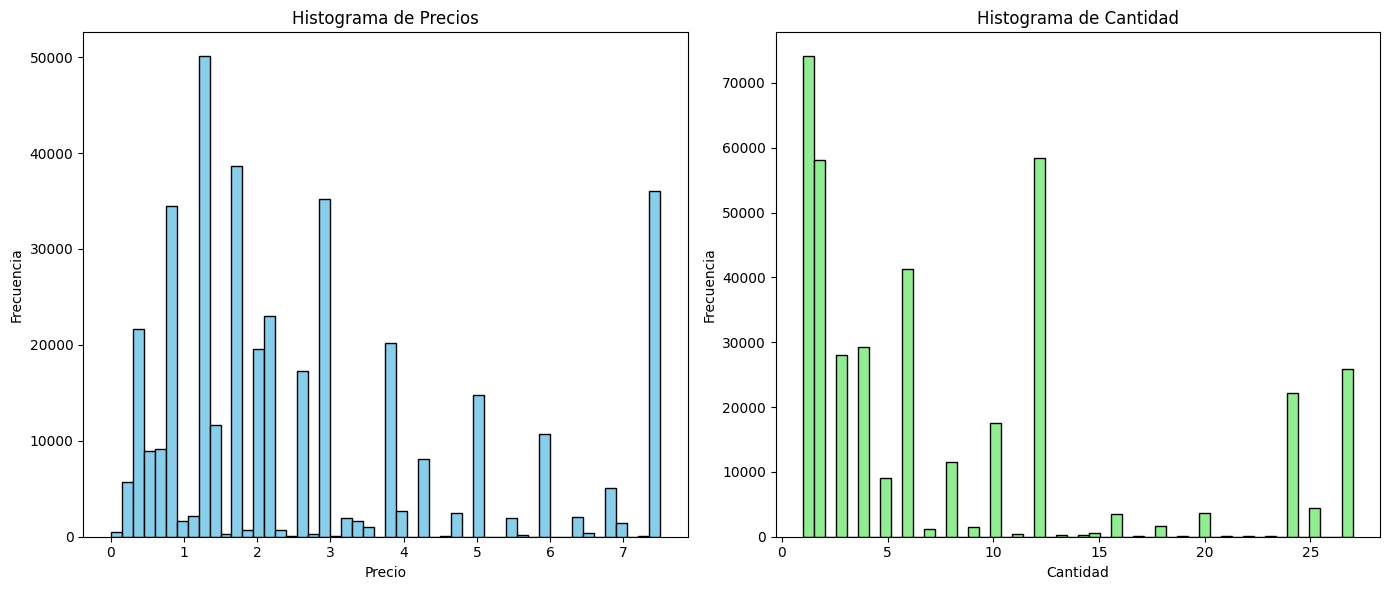


Conteo de datos nulos por variable:
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64


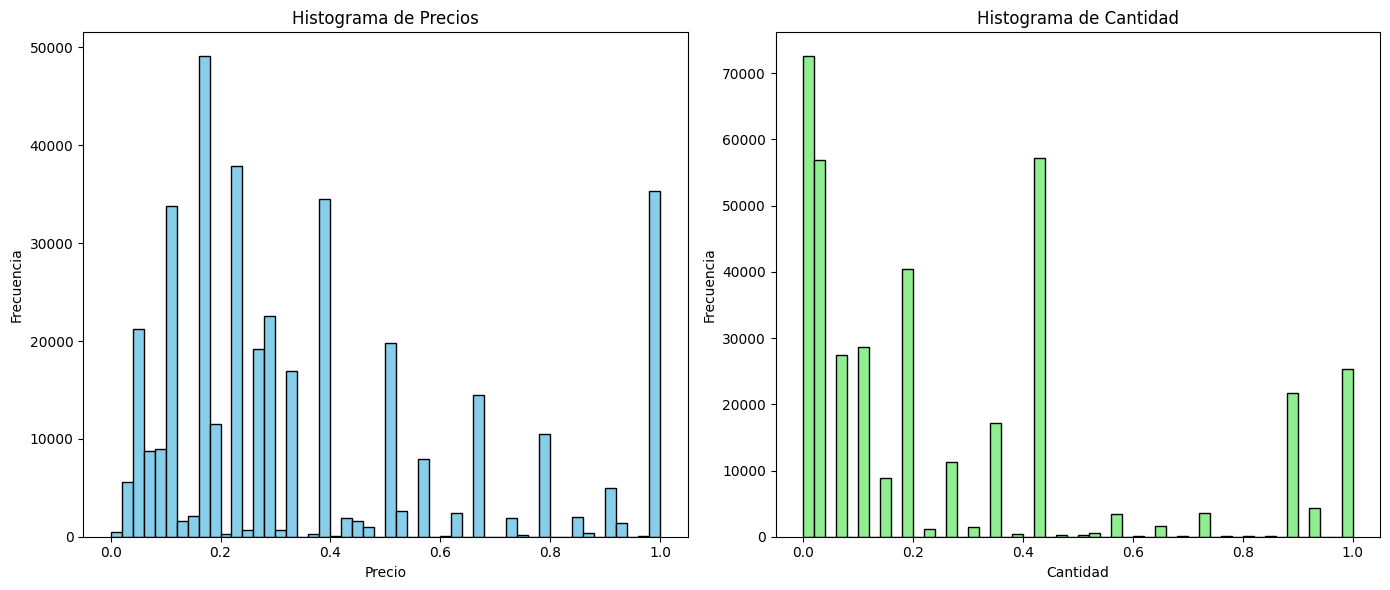


Conteo de datos nulos por variable:
Price          16096
Quantity       16096
Description        0
Country         8164
dtype: int64


In [21]:
#agregar MinMax al pipeline numeric_transformations
numeric_transformations = Pipeline([
    ('iqr', IQR(lambda_=1.5)),  # Aplicar IQR
    ('minmax', MinMax())  # Aplicar MinMax para escalar las columnas numéricas
])

# ColumnTransformer: Se aplican las transformaciones para las columnas numéricas y categóricas
column_transformer_minmax = ColumnTransformer([
    ('numerical', numeric_transformations, numerical_columns),  # Aplicamos IQR y MinMax a las columnas numéricas
    ('categorical', 'passthrough', categorical_columns)  # Passthrough para las columnas categóricas
], verbose_feature_names_out=False)  # No utilizar prefijos de transformación en los nombres de las columnas

column_transformer_minmax.set_output(transform='pandas')

# Aplicar el ColumnTransformer a los datos de df_retail
df_minmax = column_transformer_minmax.fit_transform(df_retail)

# Visualizar los cambios en la distribución de los datos
explore_data(df_retail)  # Ver distribución original
explore_data(df_minmax)  # Ver distribución después de aplicar MinMax


### 6. Pregunta teórica [0.5 puntos]

<p align="center">
  <img width=300 src="https://file.coinexstatic.com/2023-09-19/166BAC031F222E5910954E7D7D0BC844.png">
</p>

Finalmente, explíquele a Mr. Cheems porqué es útil la creación de pipelines al momento de hacer Feature Engineering en Machine Learning.

**Respuesta:**

*Escriba su respuesta aquí*

Los pipelines permiten aplicar transformaciones de manera sistemática y en orden, entre las que se encuentran, la imputación de valores nulos o de ouliers, lo que tiene la ventaja de que no está sujeto a errores manuales, además es sencillo modificar o reescribir parte del código o los procedimientos, por lo que su trabajo y uso es más amigable. Esto genera que los datos esten preprocesados de manera consistente antes de entrenar un modelo, lo que asegura que sea un resultado confiable.